In [1]:
import plotly.express as px
import pymongo
from pymongo import MongoClient
import pandas as pd
import re, string, timeit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [77]:
houses = pd.read_excel("/Users/michelegazzola/Desktop/data management/progetto/analisi descrittiva/houses_df.xlsx",thousands = ".")

In [3]:
houses = pd.read_csv("/Users/michelegazzola/Desktop/data management/progetto/analisi descrittiva/dataset houses/houses_df.csv",thousands = ".")

In [4]:
houses

,Unnamed: 0,_id,url,title,location,price,occasione,metratura,posizione,decriptions,...,lastUpdate,fullAddress,numberOfPictures,coordintates,address,loc,propertyDetails,constructions,equipments,numero_locali
0,0,6300ec240187219ffc458a86,https://www.idealista.it/immobile/25139414/,Monolocale in affitto in via Giovanni Boccacci...,"Ariosto-Magenta, Milano",750,False,40 m2,Piano terra con ascensore,Via Boccaccio 40 mq - Via Boccaccio: in palazz...,...,Annuncio aggiornato il 5 luglio,"{'address': ['Via Giovanni Boccaccio s.n.c', '...",20 foto,"{'lat': 45.46656418, 'lon': 9.14966393}",Via Giovanni Boccaccio - Milano (MI),"[9.14966393, 45.46656418]",NaN,NaN,NaN,1
1,1,6300ec3b0187219ffc458a88,https://www.idealista.it/immobile/24837643/,Monolocale in affitto in piazza Sant'Eustorgio...,"Mercalli-Quadronno, Milano",900,False,30 m2,2º piano senza ascensore,"Piazza Sant'Eustorgio, con affaccio sulla Dars...",...,Annuncio aggiornato il 21 luglio,"{'address': [""Piazza Sant'Eustorgio s.n.c"", 'A...",11 foto,"{'lat': 45.45027924, 'lon': 9.18972206}",Piazza Sant'Eustorgio - Milano (MI),"[9.18972206, 45.45027924]",NaN,NaN,NaN,1
2,2,6300ed33c7bf4957be06d330,https://www.idealista.it/immobile/24166258/,Monolocale in affitto in corso XXII Marzo s.n.c,"Indipendenza-Regina Giovanna, Milano",1200,False,45 m2,4º piano con ascensore,Per concordare una visita o richiedere maggior...,...,Annuncio aggiornato il 8 luglio,"{'address': ['Corso XXII Marzo s.n.c', 'Area R...",28 foto,"{'lat': 45.4743042, 'lon': 9.20524693}",Corso XXII Marzo - Milano (MI),"[9.20524693, 45.4743042]",NaN,NaN,NaN,1
3,3,6300ed44c7bf4957be06d331,https://www.idealista.it/immobile/25162815/,Monolocale in affitto in via Benigno Crespi s.n.c,"Dergano, Milano",730,False,20 m2,senza ascensore,"Ad. ze Piazzale Carlo Maciachini MM3, proponia...",...,Annuncio aggiornato il 18 agosto,"{'address': ['Via Benigno Crespi s.n.c', 'Quar...",5 foto,"{'lat': 45.5155983, 'lon': 9.21062756}",Via Benigno Crespi - Milano (MI),"[9.21062756, 45.5155983]","['20 m² commerciali', '1 locale', '1 bagno', '...",['Senza ascensore'],NaN,1
4,4,6300ed54c7bf4957be06d332,https://www.idealista.it/immobile/24629384/,"Monolocale in affitto in via Aleardo Aleardi, 10","Cenisio-Sarpi, Milano",1700,False,40 m2,2º piano senza ascensore,La zona\nQuesto accogliente monolocale si trov...,...,Annuncio aggiornato il 27 luglio,"{'address': ['Via Aleardo Aleardi, 10', 'Quart...",20 foto,"{'lat': 45.4820557, 'lon': 9.1741295}","Via Aleardo Aleardi, 10 - Milano (MI)","[9.1741295, 45.4820557]",NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,3410,6304c094d9be2e543f0e0e9f,https://www.idealista.it/immobile/25069676/,Trilocale in affitto in viale Certosa,"Accursio, Milano",1500,False,105 m2,Garage/posto auto compreso,Disponiamo di bellissimo trelocali in adiacenz...,...,Annuncio aggiornato il 24 giugno,"{'address': ['Viale Certosa', 'Quartiere Accur...",12 foto,"{'lat': 45.49317, 'lon': 9.14502}",Viale Certosa - Milano (MI),"[9.14502, 45.49317]","['105 m² commerciali', '3 locali', '2 bagni', ...",NaN,NaN,3
3411,3411,6304c09dd9be2e543f0e0ea0,https://www.idealista.it/immobile/24544186/,"Trilocale in affitto in viale Col di Lana, 6 a","Bligny-Toscana, Milano",1650,False,70 m2,3º piano con ascensore,[ITA] Disponibile da: 30/11/2022.\nPrenota onl...,...,Annuncio aggiornato il 23 agosto,"{'address': ['Viale Col di Lana, 6 a', 'Quarti...",17 foto,"{'lat': 45.45150196, 'lon': 9.18780626}","Viale Col di Lana, 6 a - Milano (MI)","[9.18780626, 45.45150196]","['70 m² commerciali, 60 m² calpestabili', '3 l...","['3º piano', 'Con ascensore']",NaN,3
3412,3412,6304c0b9d9be2e543f0e0ea3,https://www.idealista.it/immobile/11074139/,"Trilocale in affitto in viale Monte Nero, 59","Cinque Giornate-Montenero-Libia, Milano",2750,False,70 m2,Piano rialzato senza ascensore,Descrizione appartamento\nL'appartamento si tr...,...,Annuncio aggiornato il 25 marzo,"{'address': ['Viale Monte Nero, 59', 'Quartier...

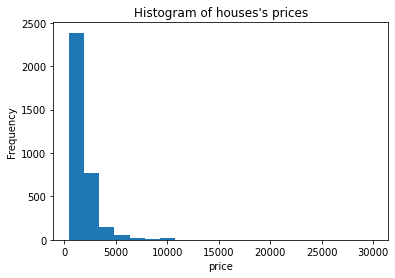

In [5]:
plt.hist(houses['price'],bins=20)
plt.title("Histogram of houses's prices")
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

array([    0,   500,  1000,  1500,  2000,  2500,  3000,  3500,  4000,
        4500,  5000,  5500,  6000,  6500,  7000,  7500,  8000,  8500,
        9000,  9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000,
       13500, 14000, 14500, 15000, 15500])

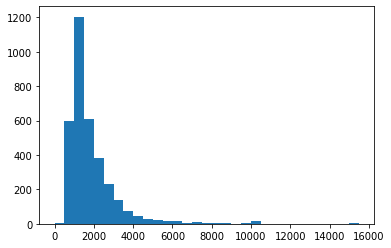

In [6]:
n, bins, patches = plt.hist(houses.price,bins=range(0, 16000, 500))
bins

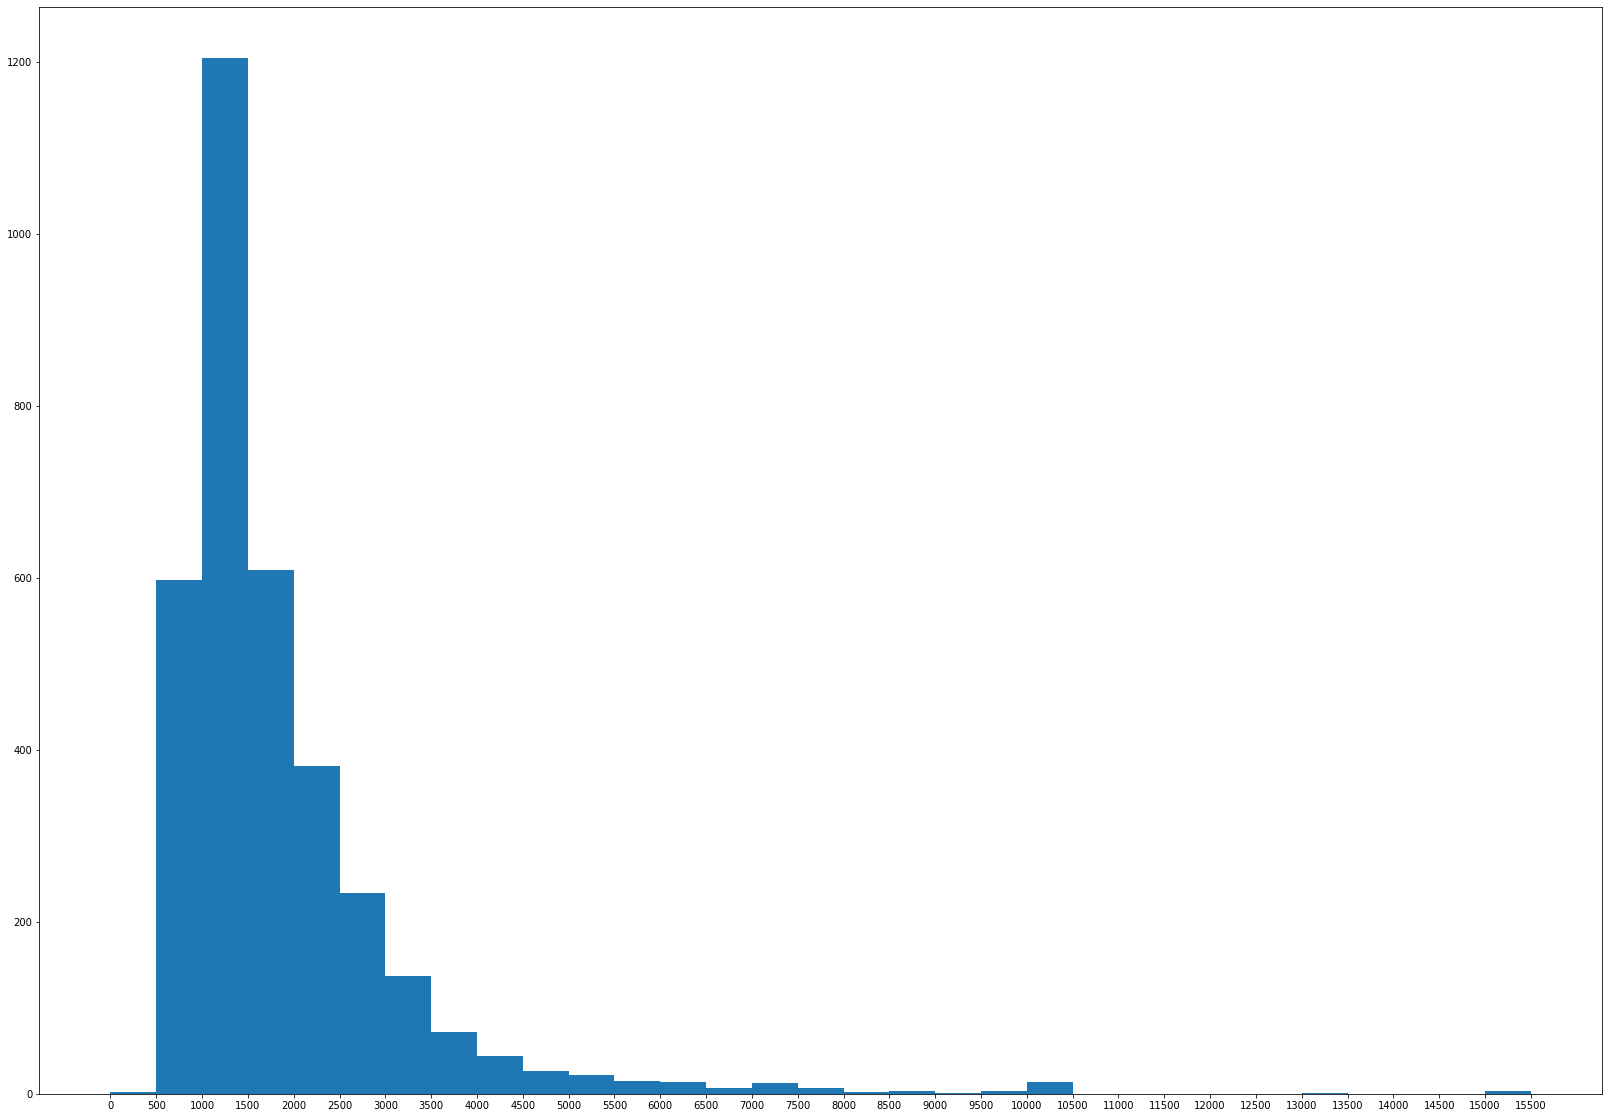

In [7]:
fig = plt.figure(figsize=(28,20))
n, bins, patches = plt.hist(houses.price,bins=range(0, 16000, 500))
plt.xticks(bins)
plt.show()

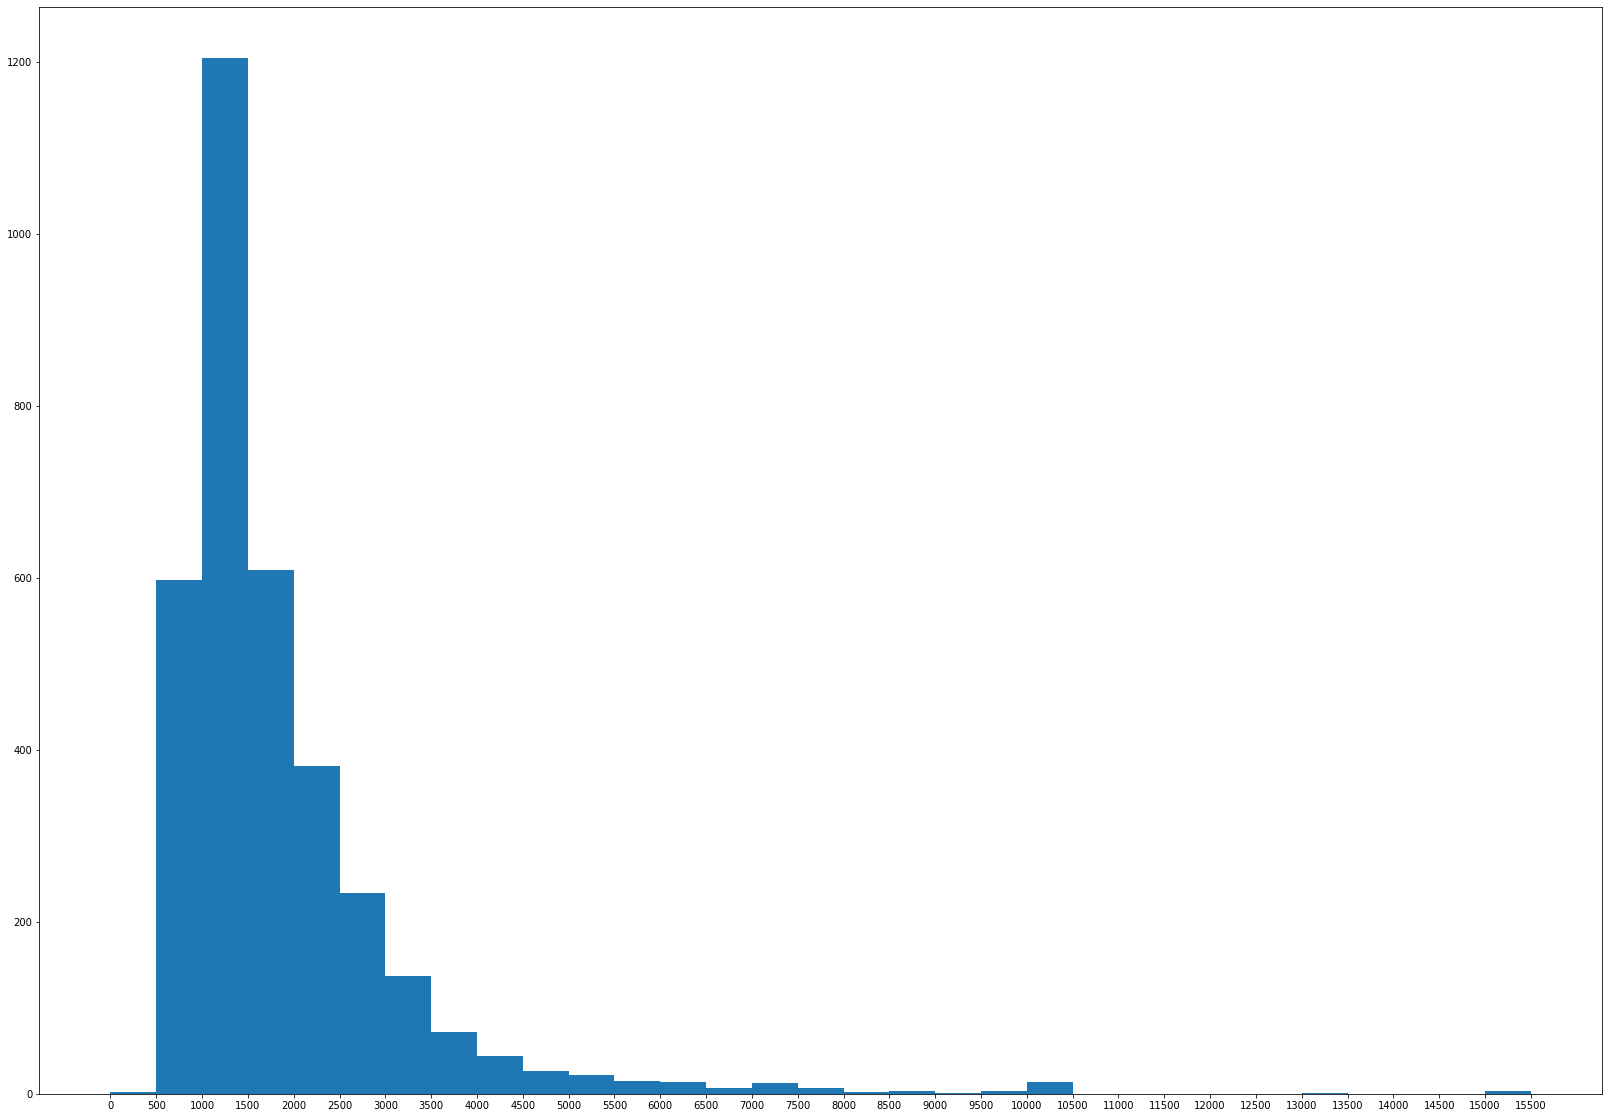

In [8]:
fig = plt.figure(figsize=(28,20))
# si può scegliere tra.....'auto', 'sturges', 'fd', 'doane', 'scott', 'rice' or 'sqrt'
n, bins, patches = plt.hist(houses.price, bins=range(0, 16000, 500))
plt.xticks(bins)
plt.show()

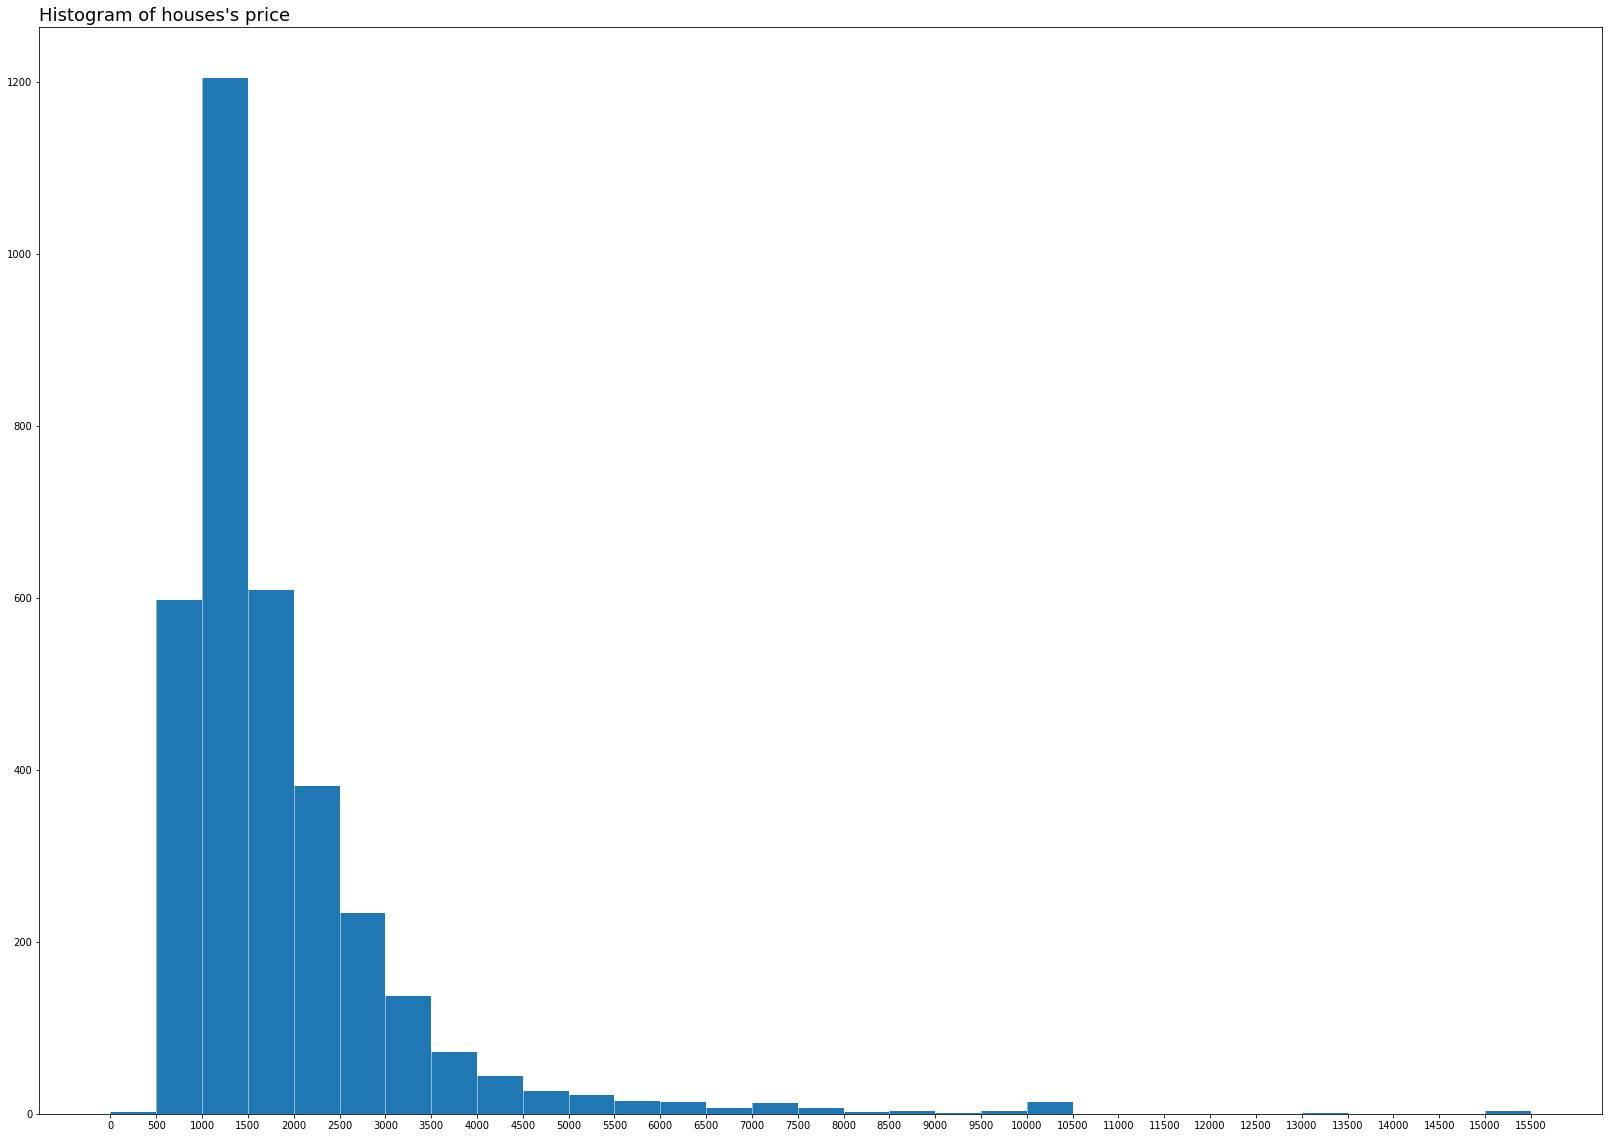

In [9]:
fig = plt.figure(figsize=(28,20))
n, bins, patches = plt.hist(houses.price,bins=range(0, 16000, 500))
plt.xticks(bins)
plt.grid(color='white', lw = 0.5, axis='x')
plt.title("Histogram of houses's price", loc = 'left', fontsize = 18)
plt.show()

In [10]:
[ "{:.2f} - {:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]

['0.00 - 500.00',
 '500.00 - 1000.00',
 '1000.00 - 1500.00',
 '1500.00 - 2000.00',
 '2000.00 - 2500.00',
 '2500.00 - 3000.00',
 '3000.00 - 3500.00',
 '3500.00 - 4000.00',
 '4000.00 - 4500.00',
 '4500.00 - 5000.00',
 '5000.00 - 5500.00',
 '5500.00 - 6000.00',
 '6000.00 - 6500.00',
 '6500.00 - 7000.00',
 '7000.00 - 7500.00',
 '7500.00 - 8000.00',
 '8000.00 - 8500.00',
 '8500.00 - 9000.00',
 '9000.00 - 9500.00',
 '9500.00 - 10000.00',
 '10000.00 - 10500.00',
 '10500.00 - 11000.00',
 '11000.00 - 11500.00',
 '11500.00 - 12000.00',
 '12000.00 - 12500.00',
 '12500.00 - 13000.00',
 '13000.00 - 13500.00',
 '13500.00 - 14000.00',
 '14000.00 - 14500.00',
 '14500.00 - 15000.00',
 '15000.00 - 15500.00']

In [11]:
[(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]

[250.0,
 750.0,
 1250.0,
 1750.0,
 2250.0,
 2750.0,
 3250.0,
 3750.0,
 4250.0,
 4750.0,
 5250.0,
 5750.0,
 6250.0,
 6750.0,
 7250.0,
 7750.0,
 8250.0,
 8750.0,
 9250.0,
 9750.0,
 10250.0,
 10750.0,
 11250.0,
 11750.0,
 12250.0,
 12750.0,
 13250.0,
 13750.0,
 14250.0,
 14750.0,
 15250.0]

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

Text(0.0, 1.0, " Histogram of houses's price")

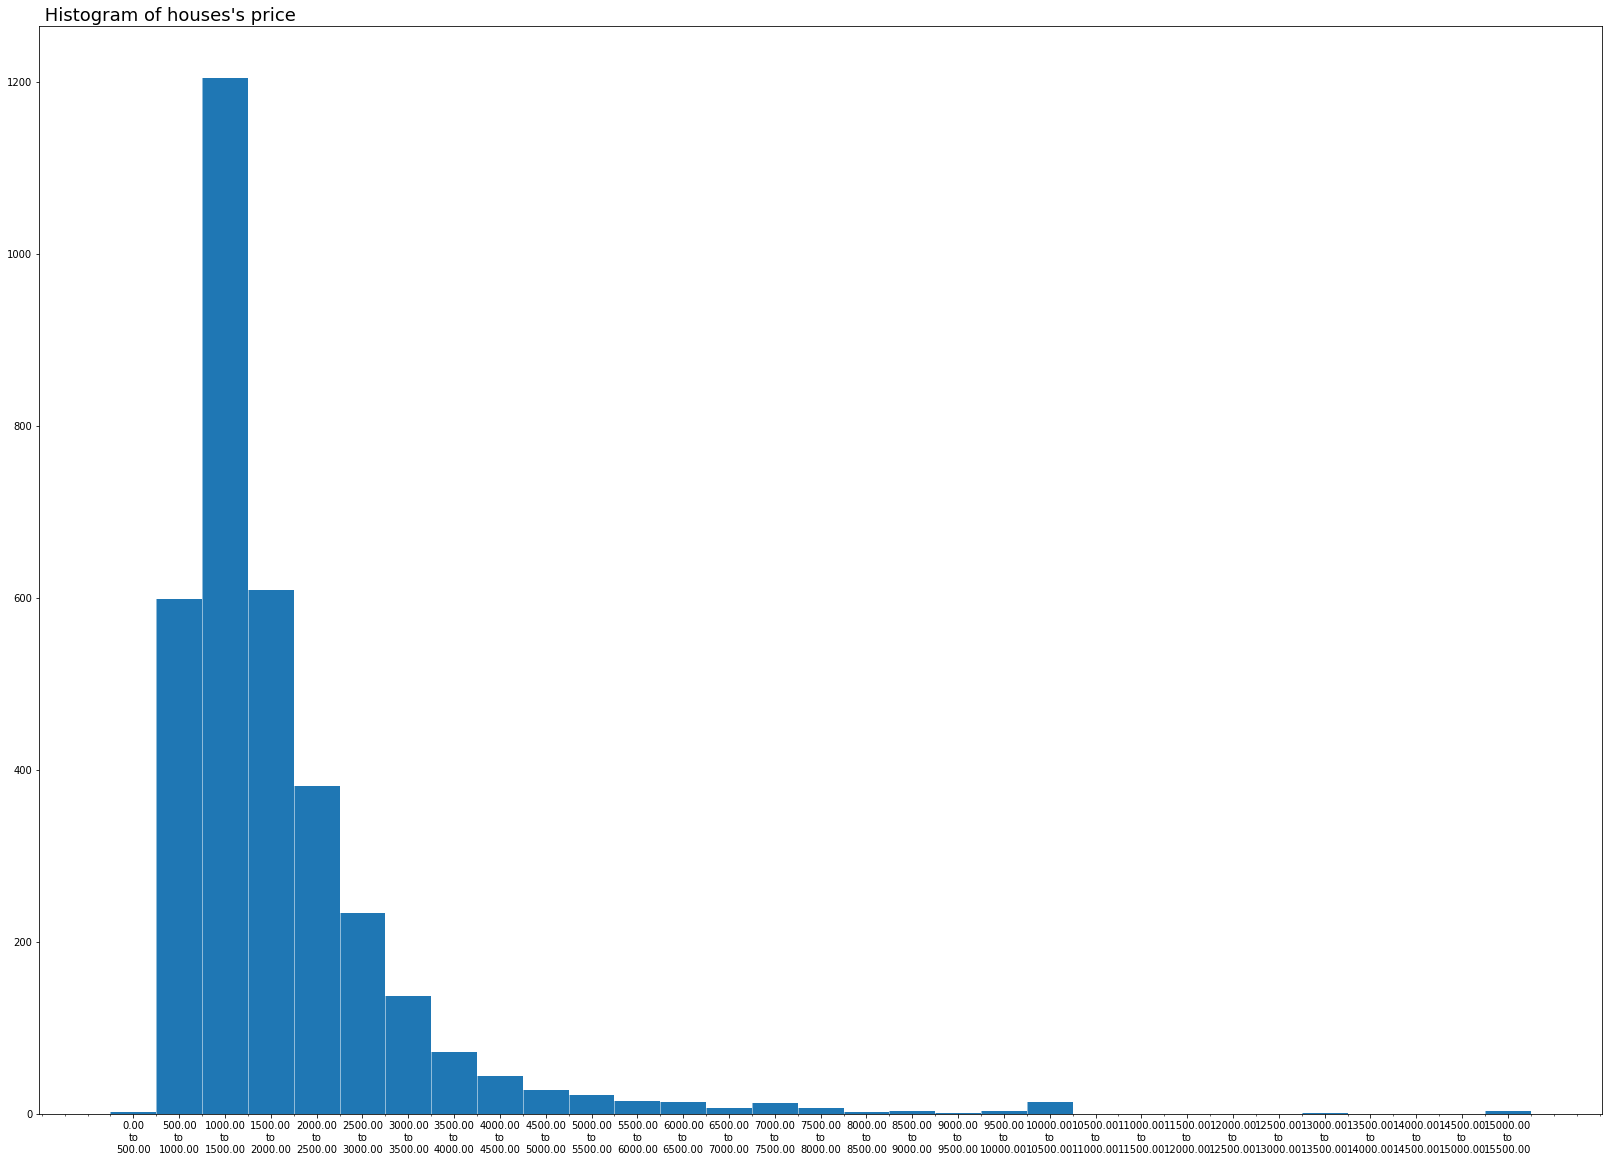

In [13]:
fig = plt.figure(figsize=(28,20))
n, bins, patches = plt.hist(houses.price,bins=range(0, 16000, 500))
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)
plt.title(" Histogram of houses's price", loc = 'left', fontsize = 18)

Text(0.0, 1.0, "Histogram of houses's price ")

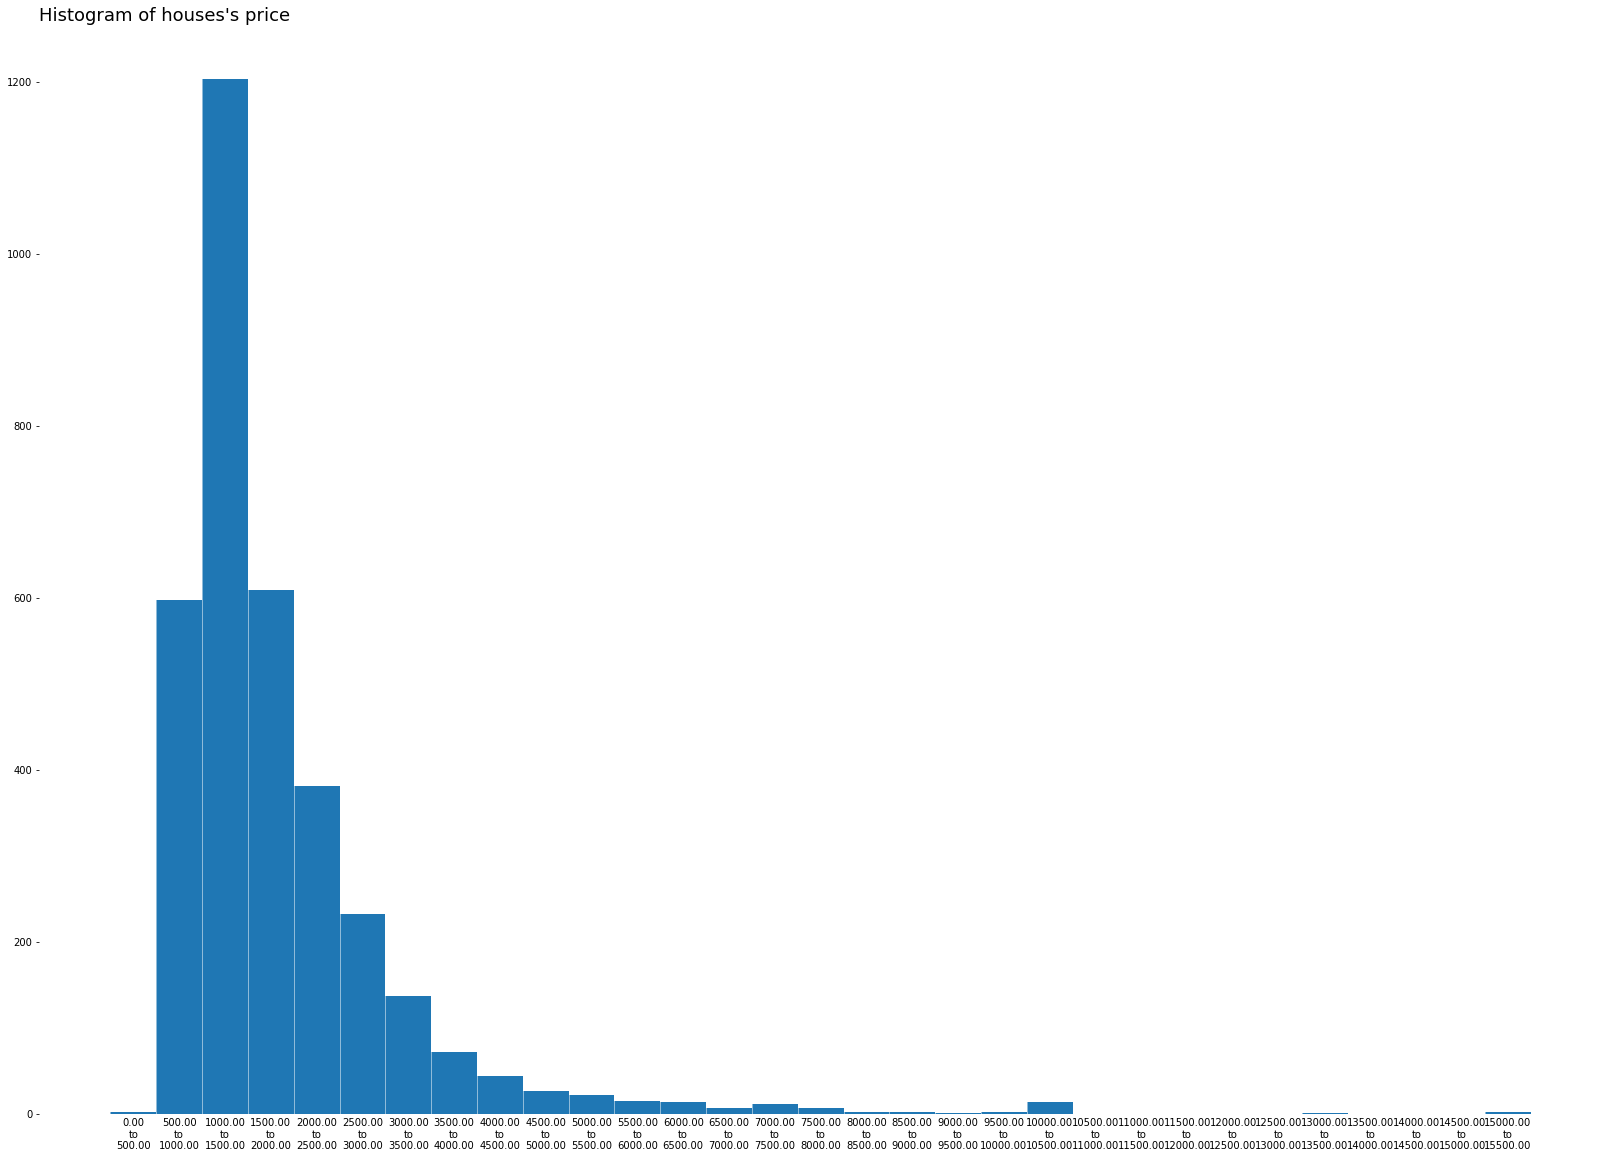

In [14]:
fig, ax = plt.subplots(1, figsize=(28,20))
n, bins, patches = plt.hist(houses.price,bins=range(0, 16000, 500))
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)
ax.tick_params(axis='x', which='both',length=0)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Histogram of houses's price ", loc = 'left', fontsize = 18)

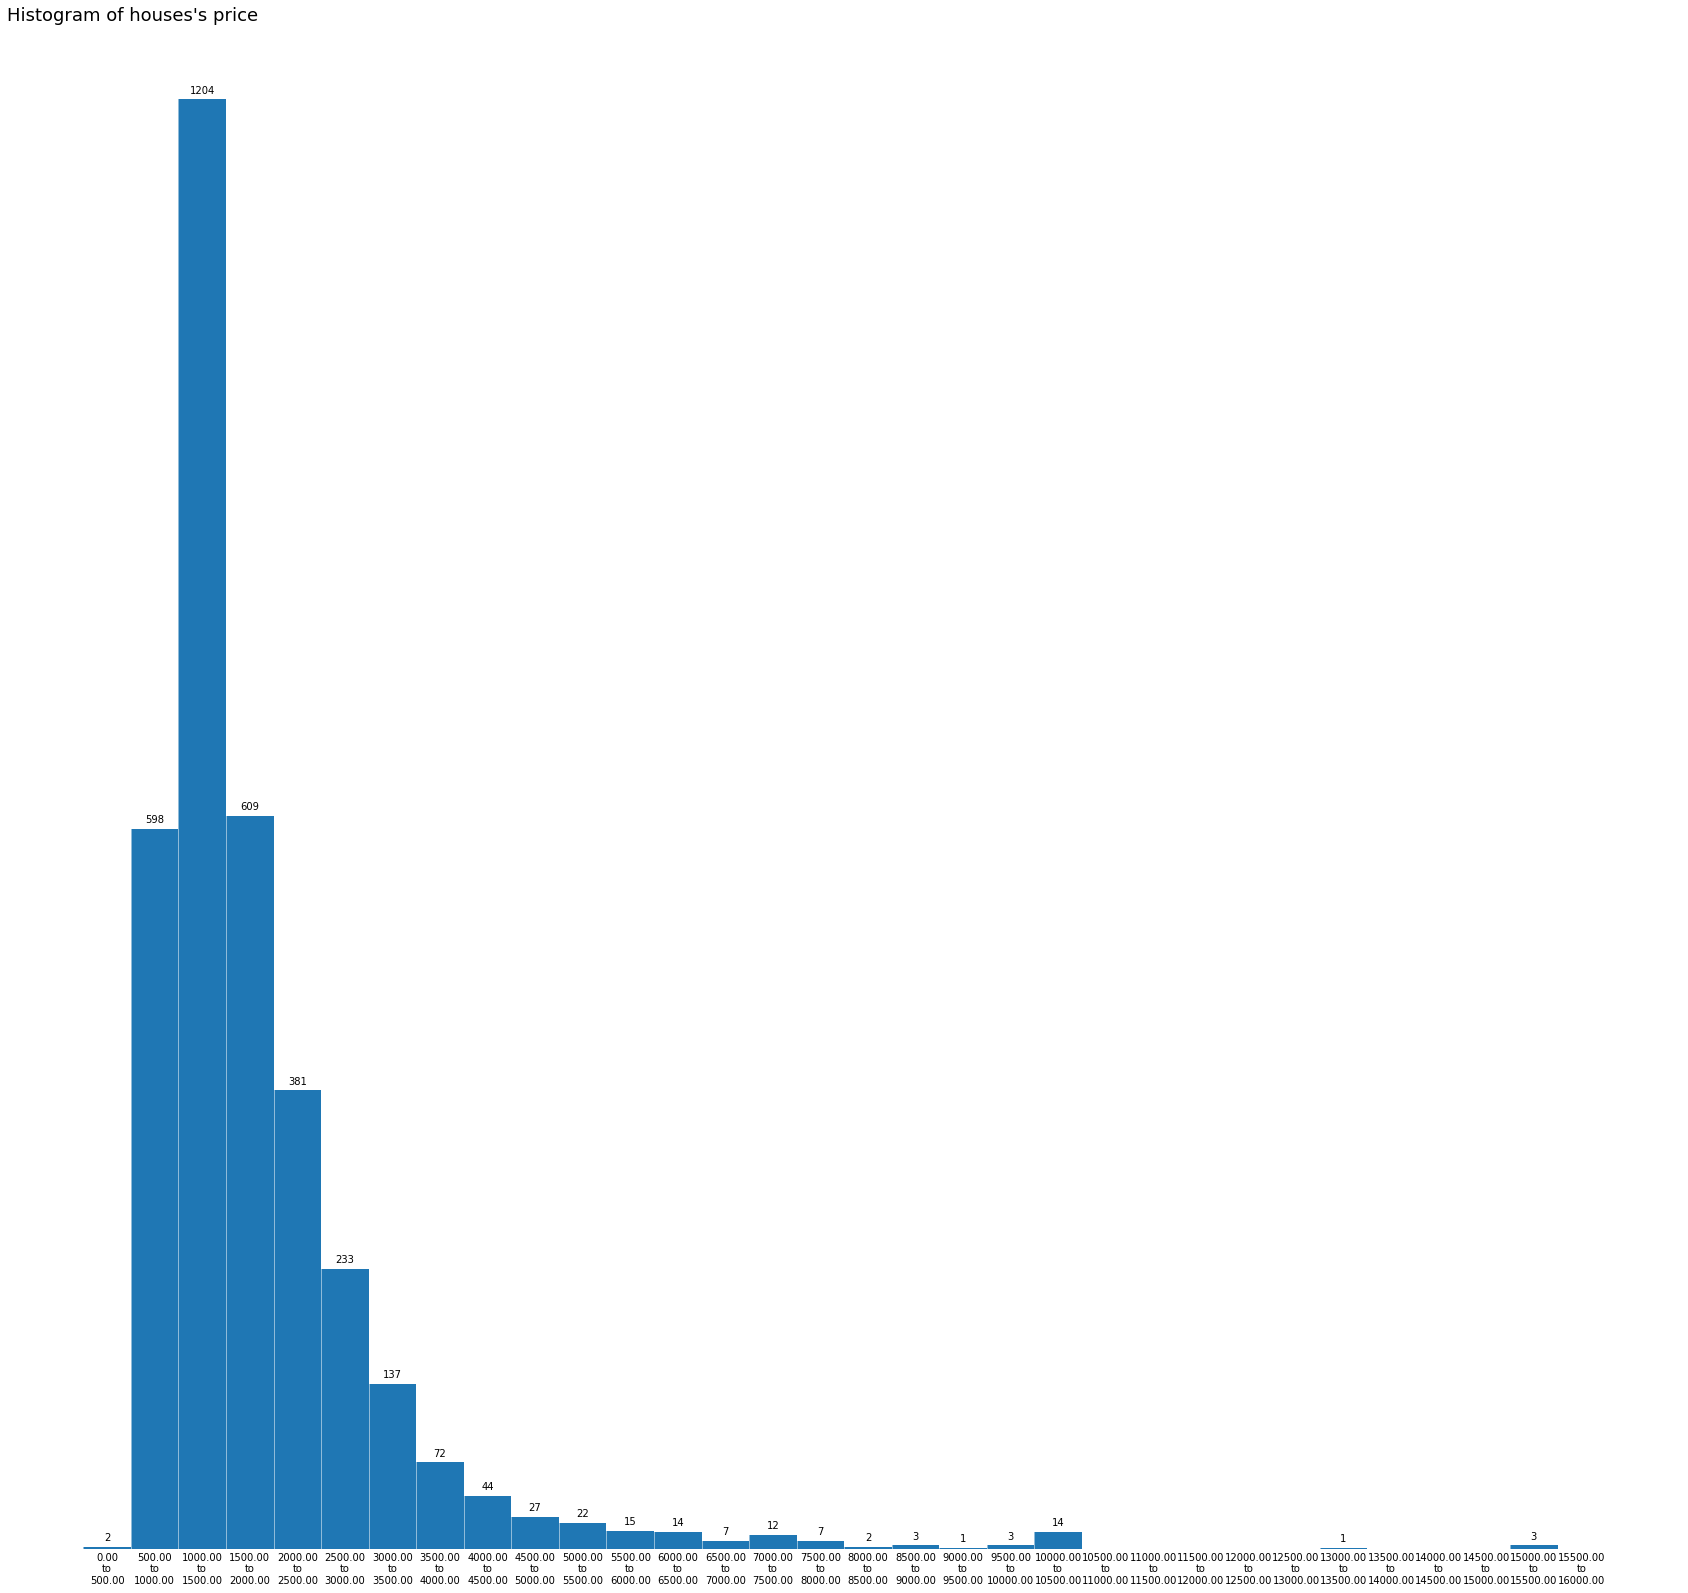

In [15]:
fig, ax = plt.subplots(1, figsize=(30,28))
n, bins, patches = plt.hist(houses.price,bins=range(0, 16500, 500))
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)
ax.tick_params(axis='x', which='both',length=0)
plt.yticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# per mettere i valori sulle barre dell'istogramma
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+5, int(value), ha='center')
plt.title("Histogram of houses's price ", loc = 'left', fontsize = 18)
plt.show()

In [91]:
#eliminato dal 16500 al 30000 perchè erano presenti solo 4 annunci di case con un prezzo all'interno di questo range